In [1]:
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib.pyplot as plt

In [137]:
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
import pandas as pd
ad = pd.read_csv("HW4Data.csv")
df  = ad.copy()
df.head()

,Days,Corn_NDVI_2013,Cotton_NDVI_2013,Soybean_NDVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Soybean_NDVI_2014,Corn_MSAVI_2013,Cotton_MSAVI_2013,Soybean_MSAVI_2013,Corn_MSAVI_2014,Cotton_MSAVI_2014,Soybean_MSAVI_2014
0,116,0.621638,0.182465,0.710824,0.548149,0.200251,0.665377,0.763500,0.307711,0.820558,0.702741,0.330965,0.763316
1,117,0.639923,0.183393,0.690518,0.554911,0.201925,0.634771,0.776259,0.308948,0.804358,0.707755,0.332663,0.734997
2,118,0.658207,0.184321,0.670212,0.561673,0.203599,0.604165,0.789019,0.310186,0.788159,0.712769,0.334361,0.706678
3,119,0.676491,0.185248,0.649907,0.568434,0.205272,0.573559,0.801779,0.311423,0.771959,0.717782,0.336059,0.678359
4,120,0.694776,0.186176,0.629601,0.575196,0.206946,0.542953,0.814539,0.312660,0.755760,0.722796,0.337757,0.650040


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Days                164 non-null    int64  
 1   Corn_NDVI_2013      164 non-null    float64
 2   Cotton_NDVI_2013    164 non-null    float64
 3   Soybean_NDVI_2013   164 non-null    float64
 4   Corn_NDVI_2014      164 non-null    float64
 5   Cotton_NDVI_2014    164 non-null    float64
 6   Soybean_NDVI_2014   164 non-null    float64
 7   Corn_MSAVI_2013     164 non-null    float64
 8   Cotton_MSAVI_2013   164 non-null    float64
 9   Soybean_MSAVI_2013  164 non-null    float64
 10  Corn_MSAVI_2014     164 non-null    float64
 11  Cotton_MSAVI_2014   164 non-null    float64
 12  Soybean_MSAVI_2014  164 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days,164.0,197.500000,47.486840,116.000000,156.750000,197.500000,238.250000,279.000000
Corn_NDVI_2013,164.0,0.547841,0.274739,0.162116,0.228958,0.644869,0.813076,0.857355
Cotton_NDVI_2013,164.0,0.599480,0.233086,0.182465,0.414002,0.676976,0.812448,0.840070
Soybean_NDVI_2013,164.0,0.512099,0.203771,0.181936,0.320360,0.548224,0.704099,0.774130
Corn_NDVI_2014,164.0,0.536385,0.273825,0.151924,0.214719,0.595949,0.805211,0.880361
Cotton_NDVI_2014,164.0,0.614032,0.221563,0.200251,0.452332,0.684612,0.822700,0.859323
Soybean_NDVI_2014,164.0,0.490801,0.214127,0.178472,0.259760,0.544604,0.707431,0.763533
Corn_MSAVI_2013,164.0,0.661506,0.252562,0.278229,0.371824,0.780063,0.896445,0.922970
Cotton_MSAVI_2013,164.0,0.715434,0.210338,0.307711,0.577429,0.802152,0.895990,0.912557
Soybean_MSAVI_2013,164.0,0.637250,0.191785,0.306931,0.467472,0.679343,0.814586,0.872209


In [42]:
df[df.columns[7:8]]

,Corn_MSAVI_2013
0,0.763500
1,0.776259
2,0.789019
3,0.801779
4,0.814539
...,...
159,0.282787
160,0.281647
161,0.280508
162,0.279369


# Polynomial regression with Scikit Learn

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [106]:
X = df['Days'].to_numpy()
y = df['Corn_NDVI_2013'].to_numpy()

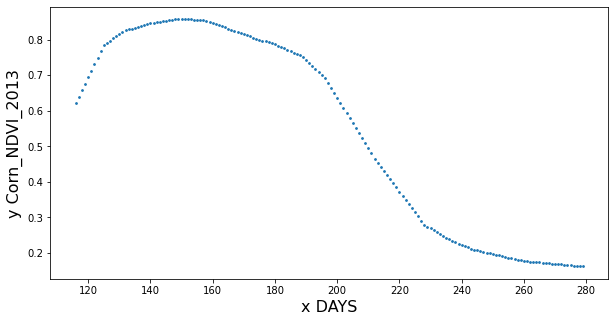

In [107]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=3)


plt.xlabel('x DAYS', fontsize=16)
plt.ylabel('y Corn_NDVI_2013', fontsize=16)
plt.show()

In [108]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_input = X[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)
print(x_mapped)

[[1.00000000e+00 1.16000000e+02 1.34560000e+04 1.56089600e+06
  1.81063936e+08]
 [1.00000000e+00 1.17000000e+02 1.36890000e+04 1.60161300e+06
  1.87388721e+08]
 [1.00000000e+00 1.18000000e+02 1.39240000e+04 1.64303200e+06
  1.93877776e+08]
 [1.00000000e+00 1.19000000e+02 1.41610000e+04 1.68515900e+06
  2.00533921e+08]
 [1.00000000e+00 1.20000000e+02 1.44000000e+04 1.72800000e+06
  2.07360000e+08]
 [1.00000000e+00 1.21000000e+02 1.46410000e+04 1.77156100e+06
  2.14358881e+08]
 [1.00000000e+00 1.22000000e+02 1.48840000e+04 1.81584800e+06
  2.21533456e+08]
 [1.00000000e+00 1.23000000e+02 1.51290000e+04 1.86086700e+06
  2.28886641e+08]
 [1.00000000e+00 1.24000000e+02 1.53760000e+04 1.90662400e+06
  2.36421376e+08]
 [1.00000000e+00 1.25000000e+02 1.56250000e+04 1.95312500e+06
  2.44140625e+08]
 [1.00000000e+00 1.26000000e+02 1.58760000e+04 2.00037600e+06
  2.52047376e+08]
 [1.00000000e+00 1.27000000e+02 1.61290000e+04 2.04838300e+06
  2.60144641e+08]
 [1.00000000e+00 1.28000000e+02 1.638400

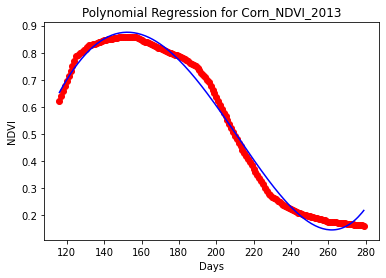

In [109]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_input = X[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)


regressor = LinearRegression()
regressor.fit(x_mapped, y)

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)
plt.scatter(X,y, color='red') 
 
plt.plot(X, y_hat,color='blue') 
 
plt.title("Polynomial Regression for Corn_NDVI_2013")
plt.xlabel('Days')
plt.ylabel('NDVI')
plt.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print("x_train.shape = ", X_train.shape)
print("x_test.shape = ", X_test.shape)
print()
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (123,)
x_test.shape =  (41,)

y_train.shape =  (123,)
y_test.shape =  (41,)


In [112]:
# find best order for polynomial regression


from sklearn.metrics import mean_squared_error
import math 

m_range = range(1, 5*15, 2)

# Testing and Testing errors
training_errors=[]
testing_errors=[]

best_m = 0
minError = math.inf

for m in m_range:
    poly = PolynomialFeatures(degree=m)
    
    # note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
    X_train_mapped = poly.fit_transform(X_train[:,np.newaxis])
    X_test_mapped = poly.fit_transform(X_test[:,np.newaxis])
    
    regressor = LinearRegression()
    regressor.fit(X_train_mapped, y_train)   # linear regression is on training data (no traning on test data)

    # Predicting values using our trained model
    y_train_hat = regressor.predict(X_train_mapped)
    y_test_hat = regressor.predict(X_test_mapped)
    
    train_error = mean_squared_error(y_train, y_train_hat)
    test_error = mean_squared_error(y_test, y_test_hat)

    training_errors.append(train_error)
    testing_errors.append(test_error)
    
    errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)
    if test_error < minError * errorDecreaseTolerance:
        minError = test_error;
        best_m = m; 

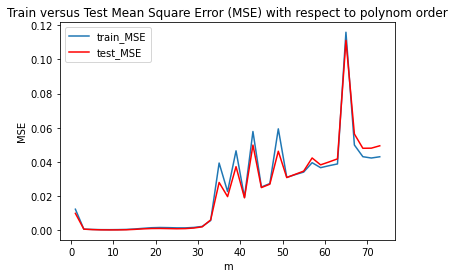

Best m is  9
MSE for m_th order polynomial regression on test data is  0.0003022400217293387


In [86]:
# plot train-test errors versus polynomial order
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(m_range, training_errors, label = "train_MSE")
plt.plot(m_range, testing_errors,color="red", label = "test_MSE")
plt.xlabel("m")
plt.ylabel("MSE")
plt.title("Train versus Test Mean Square Error (MSE) with respect to polynom order")
plt.legend()
plt.show()

print("Best m is ", best_m)  
print("MSE for m_th order polynomial regression on test data is ", minError)

# Predicting MSAVI from NDVI (Corn)

In [138]:
X = df['Corn_NDVI_2013'].to_numpy()
y = df['Corn_MSAVI_2013'].to_numpy()

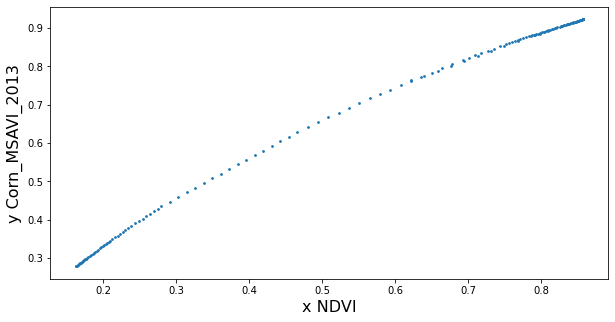

In [139]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=3)


plt.xlabel('x NDVI', fontsize=16)
plt.ylabel('y Corn_MSAVI_2013', fontsize=16)
plt.show()

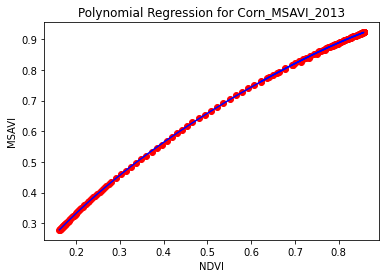

In [140]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_input = X[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)

from sklearn.preprocessing import PolynomialFeatures
regressor = LinearRegression()
regressor.fit(x_mapped, y)

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)
plt.scatter(X,y, color='red') 
 
plt.plot(X, y_hat,color='blue') 
 
plt.title("Polynomial Regression for Corn_MSAVI_2013")
plt.xlabel('NDVI')
plt.ylabel('MSAVI')
plt.show()

In [141]:
r2_score(y, y_hat)

0.9999748997606362

In [142]:
mean_squared_error(y, y_hat)

1.5913258457349472e-06

###  Polynomial Regression for Cotton

In [119]:
X = df['Days'].to_numpy()
y = df['Cotton_NDVI_2013'].to_numpy()

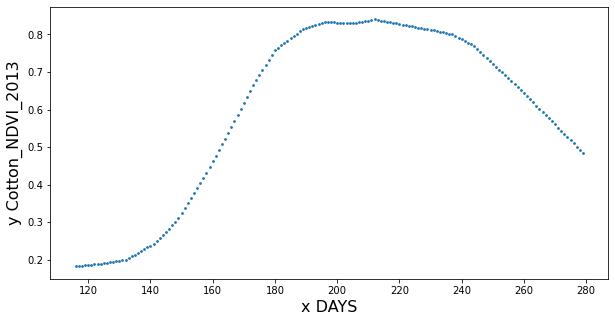

In [120]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=3)


plt.xlabel('x DAYS', fontsize=16)
plt.ylabel('y Cotton_NDVI_2013', fontsize=16)
plt.show()

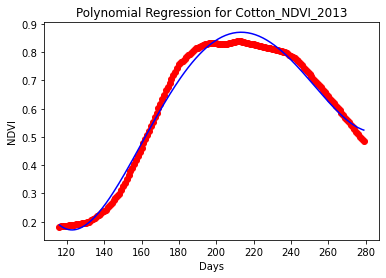

In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_input = X[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)


regressor = LinearRegression()
regressor.fit(x_mapped, y)

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)
plt.scatter(X,y, color='red') 
 
plt.plot(X, y_hat,color='blue') 
 
plt.title("Polynomial Regression for Cotton_NDVI_2013")
plt.xlabel('Days')
plt.ylabel('NDVI')
plt.show()

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print("x_train.shape = ", X_train.shape)
print("x_test.shape = ", X_test.shape)
print()
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (123,)
x_test.shape =  (41,)

y_train.shape =  (123,)
y_test.shape =  (41,)


In [123]:
m_range = range(1, 5*15, 2)

# Testing and Testing errors
training_errors=[]
testing_errors=[]

best_m = 0
minError = math.inf

for m in m_range:
    poly = PolynomialFeatures(degree=m)
    
    # note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
    X_train_mapped = poly.fit_transform(X_train[:,np.newaxis])
    X_test_mapped = poly.fit_transform(X_test[:,np.newaxis])
    
    regressor = LinearRegression()
    regressor.fit(X_train_mapped, y_train)   # linear regression is on training data (no traning on test data)

    # Predicting values using our trained model
    y_train_hat = regressor.predict(X_train_mapped)
    y_test_hat = regressor.predict(X_test_mapped)
    
    train_error = mean_squared_error(y_train, y_train_hat)
    test_error = mean_squared_error(y_test, y_test_hat)

    training_errors.append(train_error)
    testing_errors.append(test_error)
    
    errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)
    if test_error < minError * errorDecreaseTolerance:
        minError = test_error;
        best_m = m; 

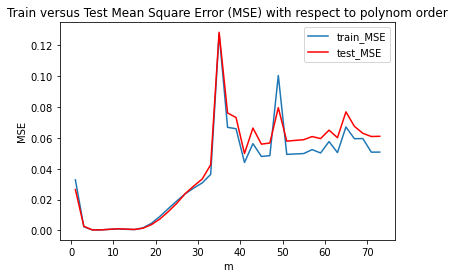

Best m is  5
MSE for m_th order polynomial regression on test data is  0.00035542812938510015


In [28]:
# plot train-test errors versus polynomial order
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(m_range, training_errors, label = "train_MSE")
plt.plot(m_range, testing_errors,color="red", label = "test_MSE")
plt.xlabel("m")
plt.ylabel("MSE")
plt.title("Train versus Test Mean Square Error (MSE) with respect to polynom order")
plt.legend()
plt.show()

print("Best m is ", best_m)  
print("MSE for m_th order polynomial regression on test data is ", minError)

# Predicting MSAVI from NDVI (Cotton)

In [143]:
X = df['Cotton_NDVI_2013'].to_numpy()
y = df['Cotton_MSAVI_2013'].to_numpy()

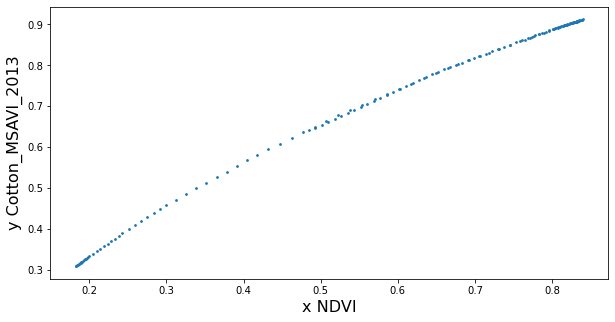

In [144]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=3)


plt.xlabel('x NDVI', fontsize=16)
plt.ylabel('y Cotton_MSAVI_2013', fontsize=16)
plt.show()

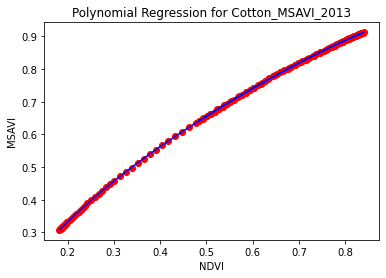

In [145]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_input = X[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)

from sklearn.preprocessing import PolynomialFeatures
regressor = LinearRegression()
regressor.fit(x_mapped, y)

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)
plt.scatter(X,y, color='red') 
 
plt.plot(X, y_hat,color='blue') 
 
plt.title("Polynomial Regression for Cotton_MSAVI_2013")
plt.xlabel('NDVI')
plt.ylabel('MSAVI')
plt.show()

In [146]:
r2_score(y, y_hat)

0.9999826578722248

In [147]:
mean_squared_error(y, y_hat)

7.625701639861819e-07

### Polynomial Regression for Soybean

In [128]:
X = df['Days'].to_numpy()
y = df['Soybean_NDVI_2013'].to_numpy()

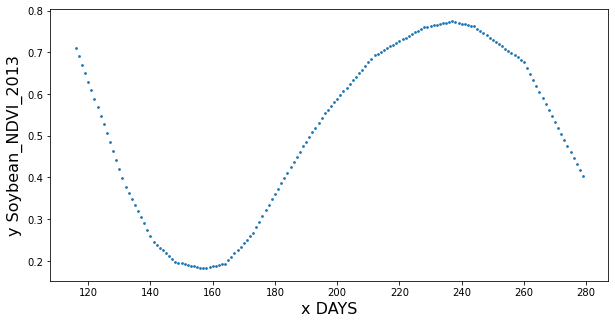

In [129]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=3)


plt.xlabel('x DAYS', fontsize=16)
plt.ylabel('y Soybean_NDVI_2013', fontsize=16)
plt.show()

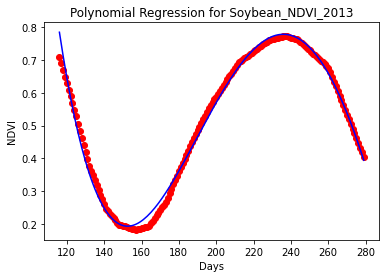

In [130]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_input = X[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)


regressor = LinearRegression()
regressor.fit(x_mapped, y)

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)
plt.scatter(X,y, color='red') 
 
plt.plot(X, y_hat,color='blue') 
 
plt.title("Polynomial Regression for Soybean_NDVI_2013")
plt.xlabel('Days')
plt.ylabel('NDVI')
plt.show()

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print("x_train.shape = ", X_train.shape)
print("x_test.shape = ", X_test.shape)
print()
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (123,)
x_test.shape =  (41,)

y_train.shape =  (123,)
y_test.shape =  (41,)


In [132]:
m_range = range(1, 5*15, 2)

# Testing and Testing errors
training_errors=[]
testing_errors=[]

best_m = 0
minError = math.inf

for m in m_range:
    poly = PolynomialFeatures(degree=m)
    
    # note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
    X_train_mapped = poly.fit_transform(X_train[:,np.newaxis])
    X_test_mapped = poly.fit_transform(X_test[:,np.newaxis])
    
    regressor = LinearRegression()
    regressor.fit(X_train_mapped, y_train)   # linear regression is on training data (no traning on test data)

    # Predicting values using our trained model
    y_train_hat = regressor.predict(X_train_mapped)
    y_test_hat = regressor.predict(X_test_mapped)
    
    train_error = mean_squared_error(y_train, y_train_hat)
    test_error = mean_squared_error(y_test, y_test_hat)

    training_errors.append(train_error)
    testing_errors.append(test_error)
    
    errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)
    if test_error < minError * errorDecreaseTolerance:
        minError = test_error;
        best_m = m; 

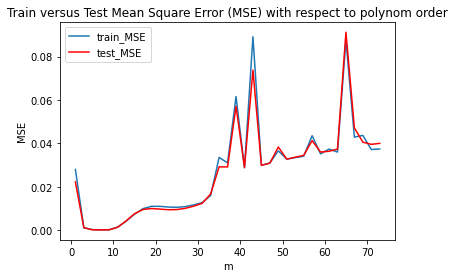

Best m is  7
MSE for m_th order polynomial regression on test data is  0.00011636895760082223


In [38]:
# plot train-test errors versus polynomial order
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(m_range, training_errors, label = "train_MSE")
plt.plot(m_range, testing_errors,color="red", label = "test_MSE")
plt.xlabel("m")
plt.ylabel("MSE")
plt.title("Train versus Test Mean Square Error (MSE) with respect to polynom order")
plt.legend()
plt.show()

print("Best m is ", best_m)  
print("MSE for m_th order polynomial regression on test data is ", minError)

# Predicting MSAVI from NDVI (Soybean)

In [148]:
X = df['Soybean_NDVI_2013'].to_numpy()
y = df['Soybean_MSAVI_2013'].to_numpy()

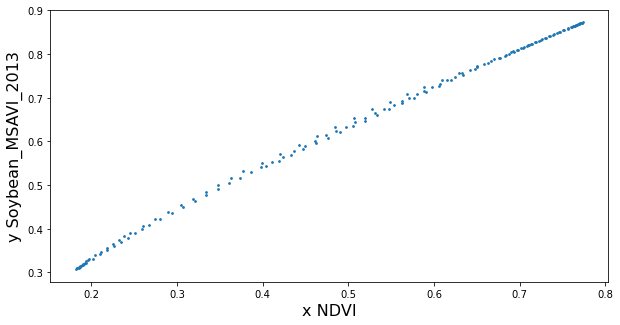

In [149]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=3)


plt.xlabel('x NDVI', fontsize=16)
plt.ylabel('y Soybean_MSAVI_2013', fontsize=16)
plt.show()

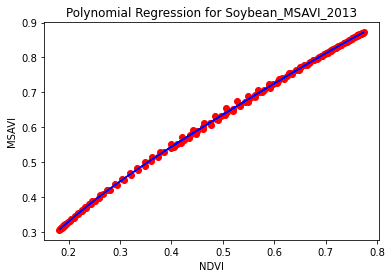

In [150]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_input = X[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)

from sklearn.preprocessing import PolynomialFeatures
regressor = LinearRegression()
regressor.fit(x_mapped, y)

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)
plt.scatter(X,y, color='red') 
 
plt.plot(X, y_hat,color='blue') 
 
plt.title("Polynomial Regression for Soybean_MSAVI_2013")
plt.xlabel('NDVI')
plt.ylabel('MSAVI')
plt.show()

In [151]:
r2_score(y, y_hat)

0.9996512215926547

In [152]:
mean_squared_error(y, y_hat)

1.2750324282372675e-05

In [158]:
X_cornNDVI2013 = df['Corn_NDVI_2013'].to_numpy()
y_cornNDVI2014 = df['Corn_NDVI_2014'].to_numpy()
y_cornMSAVI2014 = df['Corn_MSAVI_2014'].to_numpy()

X_cottonNDVI2013 = df['Cotton_NDVI_2013'].to_numpy()
y_cottonNDVI2014 = df['Cotton_NDVI_2014'].to_numpy()
y_cottonMSAVI2014 = df['Cotton_MSAVI_2014'].to_numpy()

X_SoybeanNDVI2013 = df['Soybean_NDVI_2013'].to_numpy()
y_SoybeanNDVI2014 = df['Soybean_NDVI_2014'].to_numpy()
y_SoybeanMSAVI2014 = df['Soybean_MSAVI_2014'].to_numpy()

In [159]:
poly_corn = PolynomialFeatures(degree=4)
x_input_corn = X_cornNDVI2013[:,np.newaxis]
x_mapped_corn = poly_corn.fit_transform(x_input_corn)

poly_cotton = PolynomialFeatures(degree=3)
x_input_cotton = X_cottonNDVI2013[:,np.newaxis]
x_mapped_cotton = poly_cotton.fit_transform(x_input_cotton)

poly_soybean = PolynomialFeatures(degree=4)
x_input_soybean = X_SoybeanNDVI2013[:,np.newaxis]
x_mapped_soybean = poly_soybean.fit_transform(x_input_soybean)



regressor_cornNDVI2014 = LinearRegression()
regressor_cottonNDVI2014 = LinearRegression()
regressor_soybeanNDVI2014 = LinearRegression()

regressor_cornMSAVI2014 = LinearRegression()
regressor_cottonMSAVI2014 = LinearRegression()
regressor_soybeanMSAVI2014 = LinearRegression()

regressor_cornNDVI2014.fit(x_mapped_corn, y_cornNDVI2014)
regressor_cottonNDVI2014.fit(x_mapped_cotton,y_cottonNDVI2014)
regressor_soybeanNDVI2014.fit(x_mapped_soybean, y_SoybeanNDVI2014)

regressor_cornMSAVI2014.fit(x_mapped_corn, y_cornMSAVI2014)
regressor_cottonMSAVI2014.fit(x_mapped_cotton,y_cottonMSAVI2014)
regressor_soybeanMSAVI2014.fit(x_mapped_soybean, y_SoybeanMSAVI2014)

# Predicting values using our trained model
y_hat = regressor_cornNDVI2014.predict(x_mapped_corn)
y_hat2 = regressor_cottonNDVI2014.predict(x_mapped_cotton)
y_hat3 = regressor_soybeanNDVI2014.predict(x_mapped_soybean)


y_hat4 = regressor_cornMSAVI2014.predict(x_mapped_corn)
y_hat5 = regressor_cottonMSAVI2014.predict(x_mapped_cotton)
y_hat6 = regressor_soybeanMSAVI2014.predict(x_mapped_soybean)

Text(0, 0.5, 'Soybean_NDVI/MSAVI_2014')

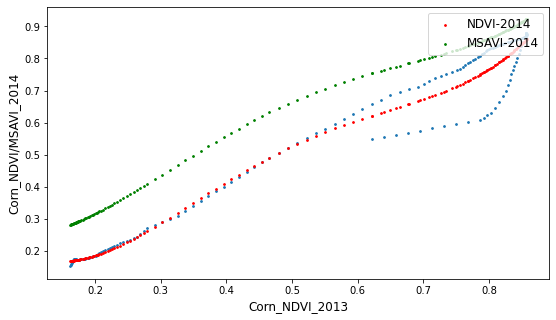

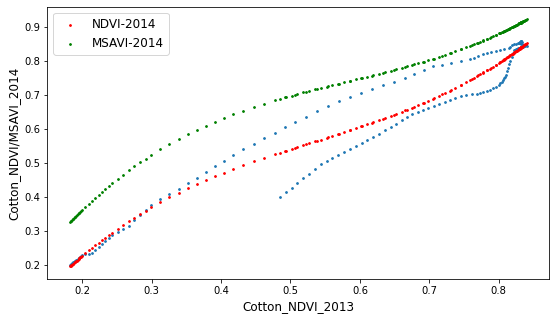

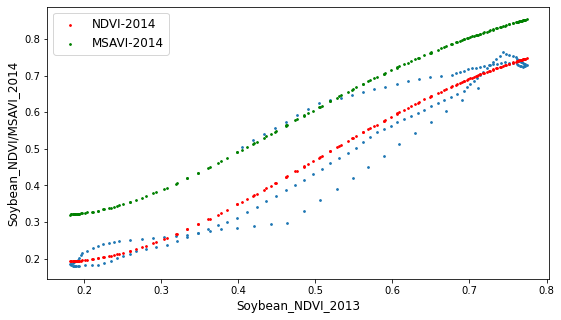

In [164]:
plt.figure(1,figsize=(9, 5))
plt.scatter(X_cornNDVI2013, y_cornNDVI2014, s = 3)
plt.scatter(X_cornNDVI2013, y_hat, s = 3, color='red',label="NDVI-2014")
plt.scatter(X_cornNDVI2013, y_hat4, s = 3, color='green',label="MSAVI-2014")
plt.legend(loc="upper right", fontsize=12)
plt.xlabel('Corn_NDVI_2013', fontsize=12)
plt.ylabel('Corn_NDVI/MSAVI_2014', fontsize=12)

plt.figure(2,figsize=(9, 5))
plt.scatter(X_cottonNDVI2013, y_cottonNDVI2014, s = 3)
plt.scatter(X_cottonNDVI2013, y_hat2, s = 3, color='red',label="NDVI-2014")
plt.scatter(X_cottonNDVI2013, y_hat5, s = 3, color='green',label="MSAVI-2014")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Cotton_NDVI_2013', fontsize=12)
plt.ylabel('Cotton_NDVI/MSAVI_2014', fontsize=12)

plt.figure(3,figsize=(9, 5))
plt.scatter(X_SoybeanNDVI2013, y_SoybeanNDVI2014, s = 3)
plt.scatter(X_SoybeanNDVI2013, y_hat3, s = 3, color='red',label="NDVI-2014")
plt.scatter(X_SoybeanNDVI2013, y_hat6, s = 3, color='green',label="MSAVI-2014")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Soybean_NDVI_2013', fontsize=12)
plt.ylabel('Soybean_NDVI/MSAVI_2014', fontsize=12)